# Introdução

Classificação de imagem Bart e Homer
Dataset images personagens do programa **Os Simpsons**

Objetivo:
* Criar Rede Neural capaz de classificar/reconhecer personagens Bart e Homer
1. Rede Neural Convolucional (CNN)
2. Treinamento
3. Resultados
4. Avaliação
5. Exemplo



**Resumo**:

Os Simpsons é uma série de animação e sitcom norte-americana criada por Matt Groening para a Fox Broadcasting Company. A série é uma paródia satírica do estilo de vida da classe média dos Estados Unidos (como cultura, sociedade e televisão) e aspectos da condição humana, através da família protagonista, que consiste de Homer Jay Simpson, Marjorie (Marge) Bouvier Simpson, Bartholomew (Bart) Simpson, Elisabeth (Lisa) Marie Simpson e Margareth (Maggie) Simpson, cuja vida se passa na fictícia cidade de Springfield. 

<center><img src="https://upload.wikimedia.org/wikipedia/pt/e/e6/The_Simpsons_promo.png"></center>
      <center>The SimpsonsTM. Todos os direitos reservados a 20th Century Fox, Gracie Films e principalmente a Rede Fox e a Matt Groening. Copyright, 1989-2013</center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

print(f'tensorflow version: {tf.__version__}')


tensorflow version: 2.15.0


##  Preparar o conjunto de dados/images ***(Bart e Homer)***

In [5]:
# Working path
PATH_DATASET = 'archive/dataset_personagens/dataset_personagens'
print('List dir:')
for file in os.listdir(PATH_DATASET):
  print(file)

List dir:
test_set
training_set


# Separação Dados de treino e teste/validação

In [6]:
train_dir = os.path.join(PATH_DATASET, 'training_set')
validation_dir = os.path.join(PATH_DATASET, 'test_set')

train_bart_dir = os.path.join(train_dir, 'bart')
train_homer_dir = os.path.join(train_dir, 'homer')
validation_bart_dir = os.path.join(validation_dir, 'bart')
validation_homer_dir = os.path.join(validation_dir, 'homer')

num_bart_tr = len(os.listdir(train_bart_dir))
num_homer_tr = len(os.listdir(train_homer_dir))

num_bart_val = len(os.listdir(validation_bart_dir))
num_homer_val = len(os.listdir(validation_homer_dir))

total_train = num_bart_tr + num_homer_tr
total_val = num_bart_val + num_homer_val

print('total training bart images:', num_bart_tr)
print('total training homer images:', num_homer_tr)

print('total validation bart images:', num_bart_val)
print('total validation homer images:', num_homer_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training bart images: 118
total training homer images: 78
total validation bart images: 42
total validation homer images: 31
--
Total training images: 196
Total validation images: 73


# Verificação dos dados

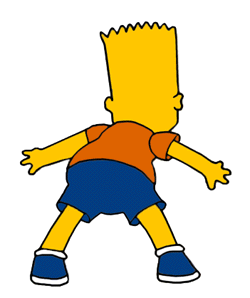

In [7]:
img_bart = os.path.join(train_bart_dir, os.listdir(train_bart_dir)[5])
PIL.Image.open(img_bart)

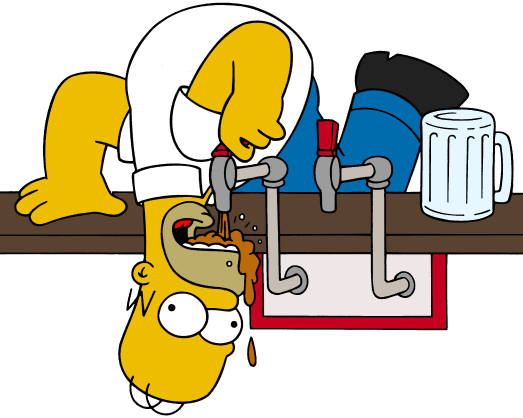

In [8]:
img_homer = os.path.join(train_homer_dir, os.listdir(train_homer_dir)[13])
PIL.Image.open(img_homer)

### Pré-processamento e Aumento de dados de imagem

In [9]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# dados treino com aumento do conjunto de imagems
train_image_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 7,
                               horizontal_flip = True,
                               shear_range = 0.2,
                               height_shift_range = 0.05,
                               zoom_range = 0.2)

val_image_gen = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=IMG_SIZE,
                                                     class_mode='binary')

val_data_gen = val_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 shuffle=True,
                                                 target_size=IMG_SIZE,
                                                 class_mode='binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


## Visualização dos personagens

In [10]:
sample_training_images, _ = next(val_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

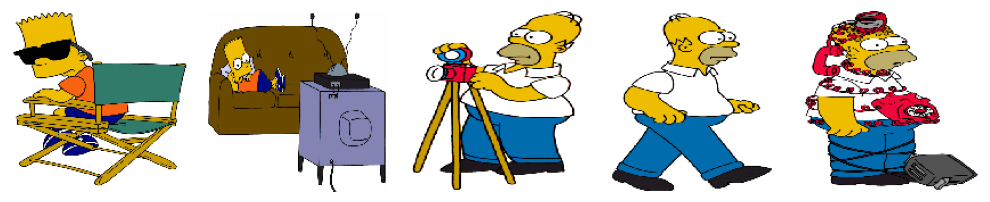

In [11]:
plotImages(sample_training_images[:5])

# Criar Modelo de ***DeepLearning***

Rede Neural Convolucional (CNN)

In [28]:

# model = keras.Sequential([
#     layers.Conv2D(16, 3, padding='same', activation='elu', input_shape=(160, 160 ,3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='elu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='elu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(512, activation='elu'),
#     layers.Dropout(0.2),
#     layers.Dense(512, activation='elu'),
#     layers.Dropout(0.2),
#     layers.Dense(1, activation='sigmoid')
# ])

model = keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),  # Adicionando Dropout para reduzir overfitting
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 80, 80, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 40, 40, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 20, 20, 128)      

# Treinamento da Rede Neural

In [29]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.>>', end='')

steps_per_epoch = train_data_gen.samples // train_data_gen.batch_size
validation_steps = val_data_gen.samples // val_data_gen.batch_size
epochs=100
    
history = model.fit(
    train_data_gen,
    epochs=epochs, 
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data_gen,
    validation_steps=validation_steps,
    callbacks=[PrintDot()],
    verbose=0
    )


.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>.>>

# Resultados do modelo

In [30]:
# Dataframe results model
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.describe()

,loss,accuracy,val_loss,val_accuracy,epoch
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.194386,0.912787,0.388517,0.894062,49.500000
std,0.191970,0.106222,0.194809,0.091124,29.011492
min,0.007668,0.510417,0.087600,0.562500,0.000000
25%,0.057674,0.888719,0.231944,0.890625,24.750000
50%,0.140772,0.949568,0.317602,0.921875,49.500000
75%,0.270456,0.977134,0.534994,0.937500,74.250000
max,1.056413,1.000000,0.815573,0.984375,99.000000


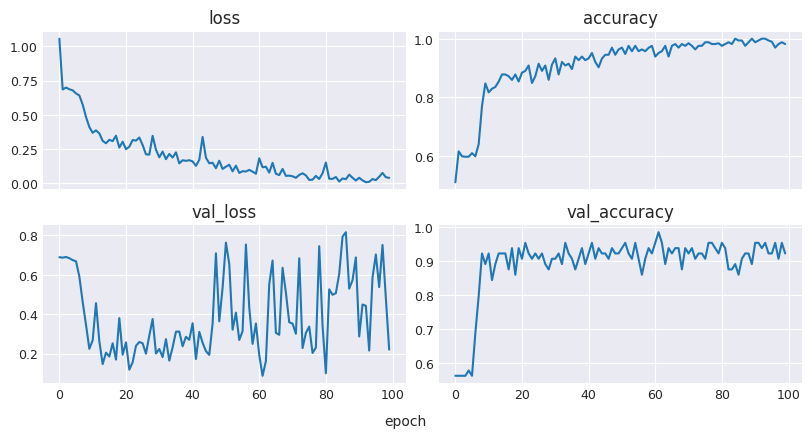

In [31]:
def subplots(df, vline=None):
  cols_names = df.columns.tolist()
  cases = list(range(len(cols_names[:-1])))
  plot_params = {
      'axes.titlesize': 12,
      'xtick.labelsize': 9,
      'ytick.labelsize': 9,
      }
  with plt.rc_context(plot_params):
    with plt.style.context('seaborn-darkgrid'):
      fig, axs = plt.subplots(2, 2, figsize=(8, 4), constrained_layout=True, sharex=True)
      for ax, i in zip(axs.flat, cases):
          ax.set_title(cols_names[:-1][i])
          ax.plot(df['epoch'],  df[cols_names[:-1][i]])
          #vline = ax.axvline(x=2, color='#7fb800')
          x = ax.axvline(x=vline, color='#ffb400') if vline != None else False
      fig.text(0.5, -0.05, 'epoch', ha='center')

subplots(hist)

# Avaliação

In [32]:
eval_results = model.evaluate(val_data_gen)
print('Testing set Accuracy: {:.2f}'.format(eval_results[1]))
print('Testing set Accuracy: {:2.2%}'.format(eval_results[1]))

3/3 [==============================] - 1s 147ms/step - loss: 0.5557 - accuracy: 0.8904
Testing set Accuracy: 0.89
Testing set Accuracy: 89.04%


# Exemplo - Teste Previsão com um imagem

In [33]:
test_bart = os.path.join(train_bart_dir, os.listdir(train_bart_dir)[5])
homer_test = os.path.join(train_homer_dir, os.listdir(train_homer_dir)[13])
inv_map = {train_data_gen.class_indices[k] : k for k in train_data_gen.class_indices}
inv_map

{0: 'bart', 1: 'homer'}

In [34]:
imagem_teste = image.load_img(homer_test,
                              target_size = (160,160))
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

previsao = model.predict(imagem_teste).flatten()
prev_name = tf.where(previsao < 0.5, 0, 1).numpy()

inv_map[prev_name[0]], previsao

1/1 [==============================] - 0s 264ms/step


('homer', array([0.9997433], dtype=float32))

1/1 [==============================] - 0s 235ms/step


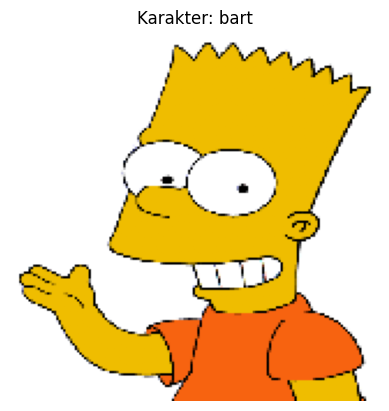

1/1 [==============================] - 0s 105ms/step


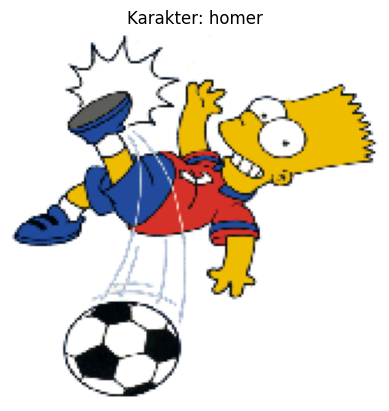

1/1 [==============================] - 0s 242ms/step


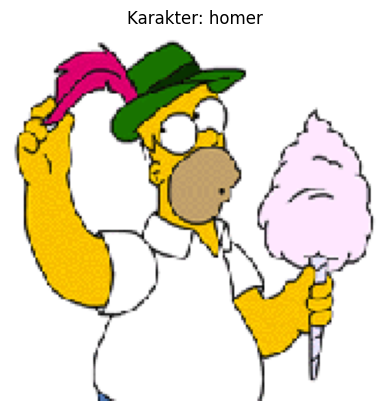

1/1 [==============================] - 0s 244ms/step


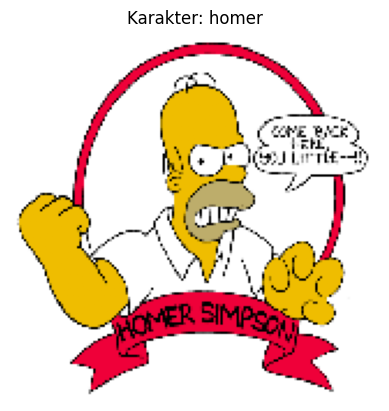

1/1 [==============================] - 0s 113ms/step


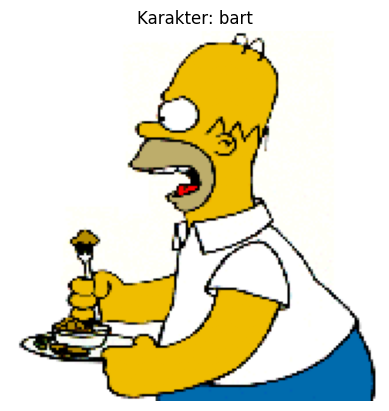

1/1 [==============================] - 0s 274ms/step


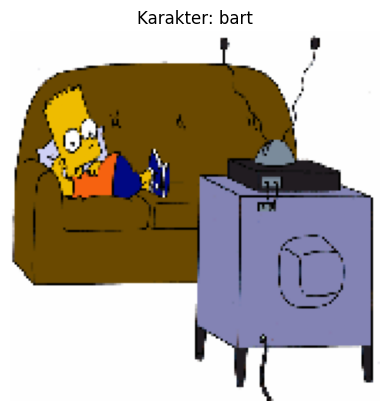

In [35]:
img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Karakter: {title}')
plt.axis("off")
plt.show()

img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Karakter: {title}')
plt.axis("off")
plt.show()

img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Karakter: {title}')
plt.axis("off")
plt.show()

img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Karakter: {title}')
plt.axis("off")
plt.show()

img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Karakter: {title}')
plt.axis("off")
plt.show()

img1, nome = next(val_data_gen)
pred = model.predict(img1).flatten()
pred = tf.where(pred < 0.5, 0, 1)
plt.imshow(img1[0])
title = inv_map[pred.numpy()[0]]
plt.title(f'Karakter: {title}')
plt.axis("off")
plt.show()